In [1]:
from IPython.display import (Image,
                             display,
                             Latex)
from sympy import (symbols, 
                   latex,              
                   DiracDelta,
                   Heaviside,
                   solve_poly_inequality,
                   Poly,
                   oo,Sum,Add,
                   Piecewise)

from sympy import (pi,
                   integrate,
                   cos,sin,Abs)

def dlatex(arg):
  display(Latex(arg))
  return None

In [2]:
def zztrans(x_n, args):
  z=symbols('z')
  x_t, u_t = x_n.as_independent(args)
  arg_1=u_t.args[0] # Linear equation (polinomial)
  n_t=u_t.free_symbols # N is the only one variable. 
  # All the rest of coefficients are constant.
  solve_p=solve_poly_inequality
  if(args == Heaviside ):
    interval=solve_p(Poly(arg_1, n_t, domain='ZZ'), '>')
    MIN=interval[0].left
    MAX=interval[0].right
  if(args == DiracDelta ):
    interval=solve_p(Poly(arg_1, n_t, domain='ZZ'), '==')
    MIN=interval[0].args[0]
    MAX=interval[0].args[0]
  return(Sum(x_t*(z**-n),(n_t,MIN,MAX)).doit())

def ztransf(x_n):
  if(x_n.has(Heaviside)):
    return(
        zztrans(x_n,Heaviside)
    )

  if(x_n.has(DiracDelta)):
    return(
        zztrans(x_n,DiracDelta)
    )
def ztrans(x_n):
  """
    Input is x[n]
  """
  ztransformation=0
  for x_term in Add.make_args(x_n):
    ztransformation+=ztransf(x_term)
  return (ztransformation.doit())#.simplify().simplify())
  #return (ztransformation.doit().simplify().simplify())

def u(n):
  return(Heaviside(n,1))

In [3]:
def iztrans(F,n,m=1.0):
  # m = |(z/a)|
  from sympy import symbols
  z,t=symbols('z,t')
  from numpy import pi as npi
  from sympy import pi as spi
  from sympy import (limit,
                     integrate)
  from sympy import (log,cos,sin)
  from numpy import log as nplog
  from numpy import cos as npcos
  from numpy import sin as npsin
  from numpy import exp as npexp
  from sympy import Heaviside 

  func=F

 # GAMBIARRA
  """Corrigindo Bugs de integrate"""
  if(abs(m)<1):
    #n=n+1
    n=-1*n
    func=-F*z**(n-1)
  else:
    func=F*z**(n-1)

  m=1
  """Corrigindo Bugs de integrate"""
  # GAMBIARRA

  #func=func.subs(z,m*cos(t)+m*1j*sin(t))
  #func=func*(-sin(t)+1j*cos(t))*m
  integral_result=integrate(func,z)
  
  
  int_param=integral_result.subs(z,abs(m)*(cos(t)+1j*sin(t)) )
  result=(int_param.subs(t,npi)-int_param.subs(t,-npi)).simplify()
  result=(spi/npi)*result.simplify()
  result=result/(2*spi*1j).simplify()

  """Corrigindo Bugs de integrate"""
  if(abs(m)<1):
    result=result*Heaviside(-n-1,1)
  """Corrigindo Bugs de integrate"""
  
  return(result.simplify())

In [4]:
z=symbols('z')
a=symbols('a')
from numpy import arange as nparange
from matplotlib.pyplot import stem,show,figure

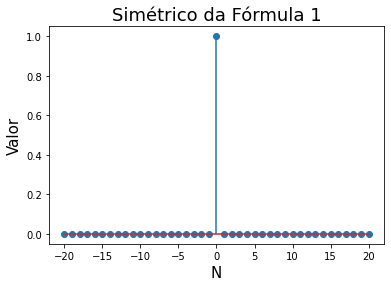

In [5]:
title="""Simétrico da Fórmula 1"""
N=20
X_z=1.0
results=[ iztrans(X_z,i) for i in nparange(-N,N+1)]

fig = figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Valor',fontsize=15)
ax1.set_xlabel('N',fontsize=15)
ax1.set_title(title,fontsize=18)
stem(nparange(-N,N+1),results, use_line_collection=True,linefmt=None, 
     markerfmt=None, basefmt=None)
show()

In [6]:
n=symbols('n')
print(ztrans(
    u(n)
  )
)

Piecewise((1/(1 - 1/z), Abs(1/z) < 1), (Sum(z**(-n), (n, 0, oo)), True))


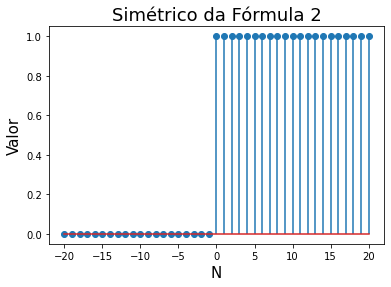

In [7]:
title="""Simétrico da Fórmula 2"""
N=20
X_z=Piecewise((z/(z - 1), True), (Sum(z**(-n), (n, 0, oo)), True))
results=[ iztrans(X_z,i) for i in nparange(-N,N+1)]

fig = figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Valor',fontsize=15)
ax1.set_xlabel('N',fontsize=15)
ax1.set_title(title,fontsize=18)
stem(nparange(-N,N+1),results, use_line_collection=True,linefmt=None, 
     markerfmt=None, basefmt=None)
show()

In [8]:
print(ztrans(
    -u(-n-1)
  )
)

-Piecewise((z/(-z + 1), Abs(z) < 1), (Sum(z**(-n), (n, -oo, -1)), True))


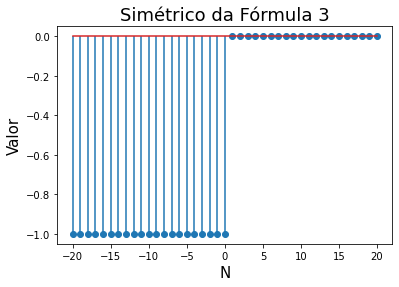

In [9]:
title="""Simétrico da Fórmula 3"""

N=20

X=Piecewise((z/(z - 1), True), (-Sum(z**(-n), (n, -oo, -1)), True))
m=0.01


results=[ iztrans(X,i,m) for i in nparange(-N,N+1)]

fig = figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Valor',fontsize=15)
ax1.set_xlabel('N',fontsize=15)
ax1.set_title(title,fontsize=18)
stem(nparange(-N,N+1),results, use_line_collection=True,linefmt=None, markerfmt=None, basefmt=None)
show()

In [10]:
print(ztrans(
    DiracDelta(n-5)
  )
)

z**(-5)


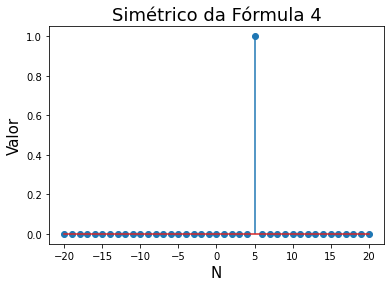

In [11]:
title="""Simétrico da Fórmula 4"""

N=20

X=z**(-5)

m=1.0


results=[ iztrans(X,i,m) for i in nparange(-N,N+1)]

fig = figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Valor',fontsize=15)
ax1.set_xlabel('N',fontsize=15)
ax1.set_title(title,fontsize=18)
stem(nparange(-N,N+1),results, use_line_collection=True,linefmt=None, markerfmt=None, basefmt=None)
show()

In [12]:
print(ztrans(
    a**n*u(n)
  )
)

Piecewise((1/(-a/z + 1), Abs(a/z) < 1), (Sum(a**n*z**(-n), (n, 0, oo)), True))


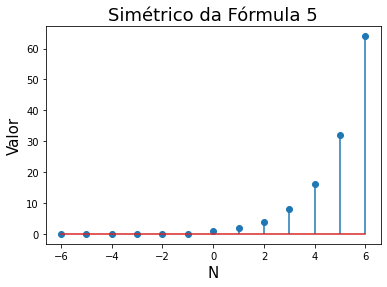

In [13]:
title="""Simétrico da Fórmula 5"""

N=6

X=Piecewise((z/(-a+z), True), (Sum(a**n*z**(-n), (n, 0, oo)), True))
X=X.subs(a,2)
# a deve ser substituído por um INTEIRO !

m=1.0


results=[ iztrans(X,i,m) for i in nparange(-N,N+1)]

fig = figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Valor',fontsize=15)
ax1.set_xlabel('N',fontsize=15)
ax1.set_title(title,fontsize=18)
stem(nparange(-N,N+1),results, use_line_collection=True,linefmt=None, markerfmt=None, basefmt=None)
show()

In [14]:
print(ztrans(
    -a**n*u(-n-1)
  )
)

-Piecewise((z/(a*(1 - z/a)), Abs(z/a) < 1), (Sum(a**n*z**(-n), (n, -oo, -1)), True))


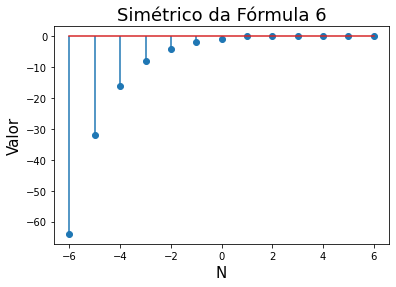

In [15]:
title="""Simétrico da Fórmula 6"""

N=6

X=Piecewise((z/(-a + z), True), (-Sum(a**n*z**(-n), (n, -oo, -1)), True))
X=X.subs(a,2)
# a deve ser substituído por um INTEIRO !

#######
m=0.999
#######


results=[ iztrans(X,i,m) for i in nparange(-N,N+1)]

fig = figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Valor',fontsize=15)
ax1.set_xlabel('N',fontsize=15)
ax1.set_title(title,fontsize=18)
stem(nparange(-N,N+1),results, use_line_collection=True,linefmt=None, 
     markerfmt=None, basefmt=None)
show()

In [22]:
print(ztrans(
    n*a**n*u(n)
  )
)

Piecewise((a/(z*(-a/z + 1)**2), Abs(a/z) < 1), (Sum(a**n*n*z**(-n), (n, 0, oo)), True))


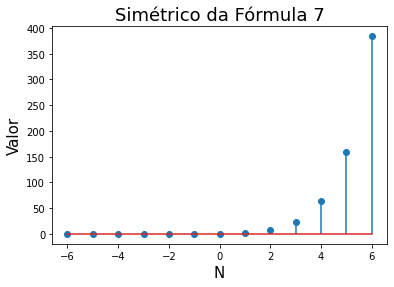

In [17]:
title="""Simétrico da Fórmula 7"""

N=6

X=Piecewise((a*z/(a - z)**2, True), (Sum(a**n*n*z**(-n), (n, 0, oo)), True))
X=X.subs(a,2)
# a deve ser substituído por um INTEIRO !

#######
m=39
#######


results=[ iztrans(X,i,m) for i in nparange(-N,N+1)]

fig = figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Valor',fontsize=15)
ax1.set_xlabel('N',fontsize=15)
ax1.set_title(title,fontsize=18)
stem(nparange(-N,N+1),results, use_line_collection=True,linefmt=None, 
     markerfmt=None, basefmt=None)
show()

In [18]:
print(ztrans(
    -n*a**n*u(-n-1)
  )
)

-Piecewise((-z/(a*(1 - z/a)**2), Abs(z/a) < 1), (Sum(a**n*n*z**(-n), (n, -oo, -1)), True))


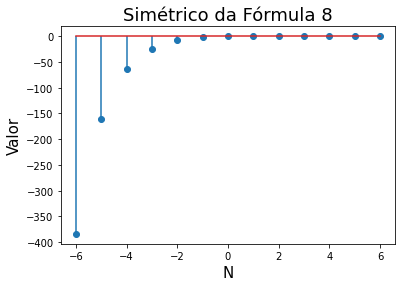

In [19]:
title="""Simétrico da Fórmula 8"""

N=6

X=Piecewise((a*z/(a**2 - 2*a*z + z**2), True), (-Sum(a**n*n*z**(-n), (n, -oo, -1)), True))
X=X.subs(a,2)
# a deve ser substituído por um INTEIRO !

#######
m=0.001
#######


results=[ iztrans(X,i,m) for i in nparange(-N,N+1)]

fig = figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Valor',fontsize=15)
ax1.set_xlabel('N',fontsize=15)
ax1.set_title(title,fontsize=18)
stem(nparange(-N,N+1),results, use_line_collection=True,linefmt=None, 
     markerfmt=None, basefmt=None)
show()